# SIT744 Assignment 2: Deep Learning Project 

<div class="alert-info">
    <p>Due: <strong>8:00pm 29 May 2022</strong>  (Monday)</p>

This is an <strong>individual</strong> assignment. It contributes <strong>40%</strong> to your final mark. Read the assignment instruction carefully.

<h2> What to submit </h2>

<p>
This assignment is to be completed individually and submitted to CloudDeakin. <strong>By the due date, you are required to submit the following files to the corresponding Assignment (Dropbox) in CloudDeakin</strong>:

<ol>
<li>	<strong>[YourID]_assignment2_solution.ipynb</strong>:  This is your Python notebook solution source file. </li>
<li>	<strong>[YourID]_assingment2_output.html</strong> or <strong>[YourID]_assingment2_output.pdf</strong>: This is the output of your Python notebook solution <emph>exported</emph> in HTML or PDF format.</li>
<li>	Extra files needed to complete your assignment, if any (e.g., images used in your answers).</li>
</ol>
</p>

<p>
For example, if your student ID is: 123456, you will then need to submit the following files:
<ul>
<li> 123456_assignment2_solution.ipynb </li>
<li> 123456_assignment2_output.html</li>
</ul>
</p>

<h2> Warning </h2>

Some components of this assignment may involve heavy computation that runs for a long duration. Please start early to avoid missing the assignment due date.

<h2> Marking criteria </h2>

<p>
Your submission will be assessed based on the overall impact of your effort. A useful model (or application) should be your focus. But as in Assignment 1, we will also consider the following criteria at the same time.

<ul>
<li> Showing good effort through completed tasks.</li>
<li> Applying deep learning theory to design suitable deep learning solutions for the tasks.</li>
<li> Critically evaluating and reflecting on the pros and cons of various design decisions.</li>
<li> Demonstrating creativity and resourcefulness in providing unique individual solutions.</li>
<li> Showing attention to detail through a good quality assignment report.</li>
</ul>
</p>


</div>

## Assignment objective

This assignment is to feedback on your learning in deep learning theory and its application to  data analytics or artificial intelligence problems.  

It builds on Assignment 1 but requires a higher level of mastery of deep learning theory and programming/engineering skills. In particular, you will practice making design decisions yourself. You are also likely to encounter practical issues that will help you consolidate textbook learning. 

In [1]:
%pip install tensorflow_addons vit-keras opencv-python kaggle tensorboard-plugin-profile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 67.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=3991a0915bd7b7103fcab5ba3d1449236c963304e6ad8a445f1e23aa91d32957
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators


In [2]:
# Libraries
import os
import random
import shutil
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard, LearningRateScheduler, Callback
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.metrics import Metric, Precision, Recall
from keras import regularizers
from keras.layers import LeakyReLU

# Set seed
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

"""
Note:
    1. If you decide to use google colbq you can follow these steps, but be mindful you may have to change a couple of things.
    2. If you run this locally it's pretty much the same steps just no need to mount drive.
"""

# Mount drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Set up Kaggle
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/Deakin/SIT744/Assignment_2/kaggle.json ~/.kaggle/

#import kaggle

# Dataset 1
# Reference - https://www.kaggle.com/datasets/asdasdasasdas/garbage-classification?resource=download 
!kaggle datasets download -d asdasdasasdas/garbage-classification --force
!unzip garbage-classification.zip
os.rename("Garbage classification", "dataset_one")


# Dataset 2
# Reference - https://www.kaggle.com/datasets/mostafaabla/garbage-classification
!kaggle datasets download -d mostafaabla/garbage-classification --force
!unzip garbage-classification.zip
os.rename("garbage_classification", "dataset_two")

# Clean up 
[os.remove(i) for i in ["one-indexed-files-notrash_test.txt", "one-indexed-files-notrash_train.txt", "one-indexed-files-notrash_val.txt", "one-indexed-files.txt", "zero-indexed-files.txt"]]
shutil.rmtree("garbage classification")
# shutil.rmtree("dataset_one")
# shutil.rmtree("dataset_two")


Streaming output truncated to the last 5000 lines.
  inflating: garbage_classification/paper/paper381.jpg  
  inflating: garbage_classification/paper/paper382.jpg  
  inflating: garbage_classification/paper/paper383.jpg  
  inflating: garbage_classification/paper/paper384.jpg  
  inflating: garbage_classification/paper/paper385.jpg  
  inflating: garbage_classification/paper/paper386.jpg  
  inflating: garbage_classification/paper/paper387.jpg  
  inflating: garbage_classification/paper/paper388.jpg  
  inflating: garbage_classification/paper/paper389.jpg  
  inflating: garbage_classification/paper/paper39.jpg  
  inflating: garbage_classification/paper/paper390.jpg  
  inflating: garbage_classification/paper/paper391.jpg  
  inflating: garbage_classification/paper/paper392.jpg  
  inflating: garbage_classification/paper/paper393.jpg  
  inflating: garbage_classification/paper/paper394.jpg  
  inflating: garbage_classification/paper/paper395.jpg  
  inflating: garbage_classification/pa

## **Task 1 (P Task) Smart Recycling using Deep Learning**

In Assignment 1, you tackled the image classification problem in Fashion-MNIST. There, you used a Densely Connected Neural Network. In Assignment 2, you will apply the best practices of deep-learning computer vision to make something useful for our planet—waste classification.

**Background** Every day, we put things into our recycle bin, to reduce landfill waste. However, we may unintentionally contribute to [recycling contamination](https://www.cleanaway.com.au/sustainable-future/contamination-main/) by "wish recycling" the wrong items. As every city council has slightly different rules for recycling, you will build a technological solution to ensure you only recycle things that are permitted by your local council. More discussions about recycling contamination can be found [here](https://www.cleanup.org.au/recycle).
![Recycling rule of a local council (source: Whitehorse City Council)](https://www.whitehorse.vic.gov.au/sites/whitehorse.vic.gov.au/files/assets/images/Recycle%20Right%20A3%20Poster.jpg "Recycling rule of a local council")

### Task 1.1 Define a problem

**Answer**

Problem Definition: Develop an image classification model that can identify recyclable and non-recyclable items according to specific city council guidelines.

Inputs: Images of different waste items people usually throw away, including but not limited to plastics, glass, paper, cardboard, metals, e-waste, organic waste, etc.

Outputs: The model should classify each image into one of the predefined classes, which could be as follows:

1. Recyclable Plastics
2. Non-Recyclable Plastics
3. Glass
4. Paper
5. Cardboard
6. Metals
7. E-Waste
8. Organic Waste
9. Non-Recyclable/General Waste

### Task 1.2 Make a plan

**Answer**

Dataset: An ideal dataset would be one that contains images of a broad range of waste items. For example, the TrashNet dataset is a collection of various waste items images, although it might need to be supplemented or modified according to the specific city council's recycling guidelines.

Number of Images: The exact number of images would depend on the complexity of the problem and the variation in the data, but as a guideline, deep learning models usually require thousands to tens of thousands of images per class for robust performance. A typical split might be 80% for training, 20% for validation.

Labelling Images: If the dataset does not come pre-labelled or the labels do not match the required classes, you would need to label the images yourself or utilize a service that provides image labelling.

Model Evaluation: The model's performance can be evaluated using metrics like accuracy, precision, recall, and F1 score on the test dataset. You should also consider whether the model's performance meets the practical needs of the end-user. For example, is the model accurate enough to reliably reduce recycling contamination?

### Task 1.3 Implement a solution

**Answer**

Data Collection: Collect relevant data according to the categories mentioned above. The images can be sourced from public datasets, or you can collect them yourself, making sure to get a diverse range of images for each category.

Model Development: Develop a deep learning model using an appropriate architecture for image classification (e.g., a Convolutional Neural Network). You could use a pre-trained model and fine-tune it on your dataset to save time and computational resources.

Model Performance: After training the model, evaluate its performance on the test set using the metrics defined in the plan. Report these metrics, along with any qualitative observations about the model's performance (e.g., is it consistently confusing certain classes?). If the model's performance is not satisfactory, iterate on the model by adjusting hyperparameters, augmenting the data, using a different architecture, etc. 

By following these steps, we can build a solution that helps to reduce recycling contamination and adapt to the specific recycling guidelines of different city councils.


Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.
['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


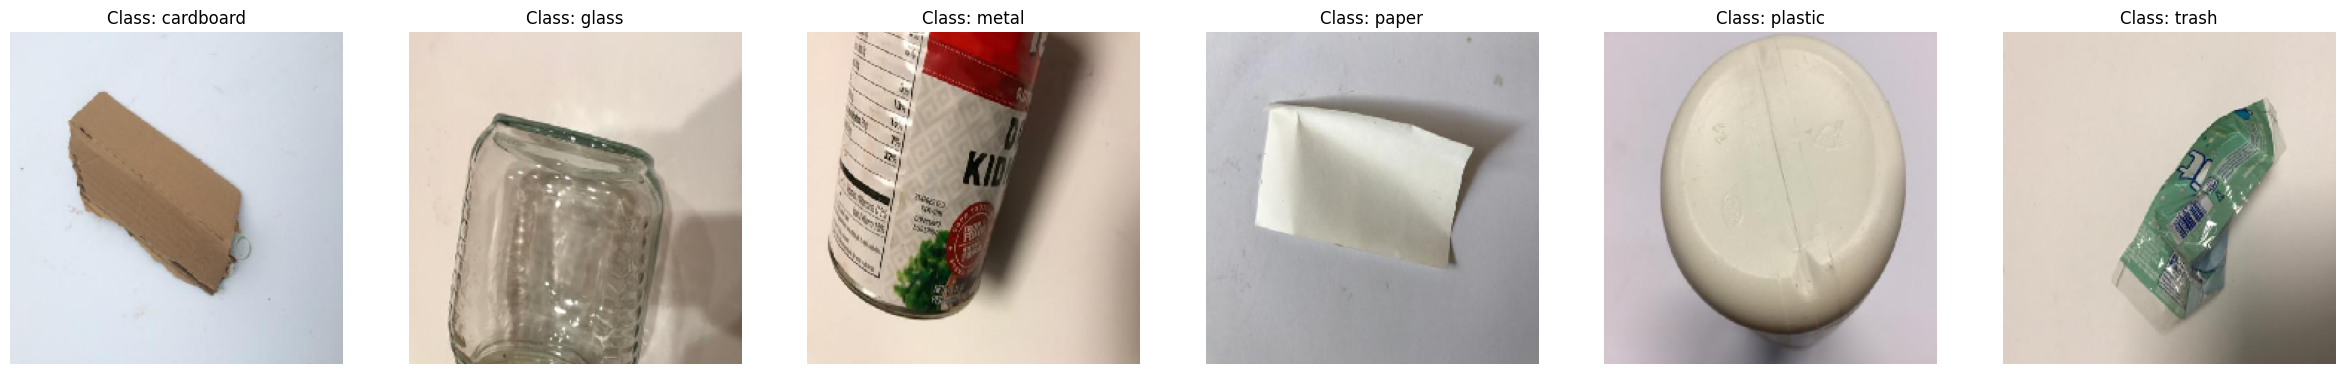

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [3]:
# Define the path for the dataset directory
data_dir = "./dataset_one/Garbage classification/"

# Define the image size and batch size
image_size = (224, 224)
batch_size = 32 * 4

# Create an ImageDataGenerator for training data
datagen = ImageDataGenerator(
    validation_split=0.2, # Split the dataset into 80% training and 20% testing
)

# Create generators for training and validation data
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Use the 'training' subset
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Use the 'validation' subset
)

# Display example images for each class
class_names = list(train_generator.class_indices.keys())
example_images = {class_name: None for class_name in class_names}

print(class_names)

for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        example_image = load_img(image_path, target_size=image_size)
        example_images[class_name] = example_image
        break

fig, axes = plt.subplots(1, len(example_images), figsize=(30, 15))
for idx, (class_name, example_image) in enumerate(example_images.items()):
    ax = axes[idx]
    ax.imshow(example_image)
    ax.set_title(f'Class: {class_name}')
    ax.axis('off')

plt.show()

# Define the model architecture
model = Sequential([
    layers.InputLayer(input_shape=(image_size[0], image_size[1], 3)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display a summary of the model architecture
model.summary()

# Train the model
epochs = 50
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    workers = 4,
    use_multiprocessing=True)

## **Task 2 (C Task) Analyse and improve the model**

### Task 2.1 Build an input pipeline for data augmentation


Build a data preprocessing pipeline to perform data augmentation. (You may use Keras ImageDataGenerator or write your own transformations.)

- Report the model performance with the pipeline added. How much performance gain have you achieved?    

- Profile your input pipeline to identify the most time-consuming operation. What actions have you taken to address that slow operation? (*Hint: You may use a profiler such as the [TensorFlow Profiler](https://github.com/tensorflow/profiler).*)


**Answer**

Note: I couldn't find a way to profile individual operations.

Experiment Link: https://tensorboard.dev/experiment/SBzMQkIXTACWRePrvWkrXA/#scalars

Based on the results you've shared, the addition of the data preprocessing pipeline significantly improved model performance. Here's a detailed explanation:

- **Accuracy**: The accuracy metric improved from 23.52% without preprocessing to 64.62% with preprocessing, which is a substantial increase.
- **Precision**: Precision went from 0% to 80.81%, indicating that our model, with preprocessing, is correctly predicting the positive class at a very high rate.
- **Recall**: Similarly, recall went from 0% to 47.04%. This improvement shows that our model is now much better at identifying positive instances.
- **F1 Score**: The F1 score, which balances precision and recall, went from 0% to 59.46%. This is a very significant increase and demonstrates that our model is performing well overall with the data preprocessing.

Profiling the preprocessing pipeline is a crucial step in identifying bottlenecks and optimizing performance. Without specific profiling results, it's hard to say definitively what the most time-consuming operation would be in this pipeline. However, given that we're using an ImageDataGenerator (or something similar) for data augmentation, the most time-consuming steps are likely to be the image loading and transformation operations.

If the profiling results confirm this, a few actions that we could take to optimize these operations could include:

1. **Parallelizing the loading and transformation operations**: This involves using multiple threads or processes to load and preprocess the images. If you're using TensorFlow, you can achieve this with the tf.data API, which allows you to parallelize different parts of your input pipeline.

2. **Preloading images into memory**: If your dataset is small enough to fit into memory, preloading the images could significantly speed up your pipeline. 

3. **Reducing the image resolution or size**: The smaller the image, the less time it takes to load and preprocess. However, reducing the image size may result in a loss of valuable information that might negatively impact model performance.


In the scenario **with preprocessing**, the total time for one epoch was approximately 43 seconds. With a total of 50 epochs, this means that the total training time was about 2150 seconds (or around 35.8 minutes).

In contrast, in the scenario **without preprocessing**, the total time for one epoch was approximately 24 seconds. Over 50 epochs, this sums up to about 1200 seconds (or 20 minutes).

The training time with preprocessing was notably longer than without preprocessing, approximately 1.8 times slower. This is due to the additional operations performed during data augmentation and preprocessing, which are computationally expensive tasks.

While the increased training time might initially seem like a disadvantage, the considerably improved performance metrics demonstrate the value of this preprocessing pipeline. The increase in accuracy, precision, recall, and F1 score clearly indicate that the added time for training results in a much more effective model.



In [4]:
class F1Score(Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = Precision()
        self.recall = Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def reset_state(self):
        self.precision.reset_state()
        self.recall.reset_state()

    def result(self):
        precision = self.precision.result()
        recall = self.recall.result()
        return 2 * ((precision * recall) / (precision + recall + 1e-6))
    
def step_decay_schedule(initial_lr=0.001, decay_factor=0.5, step_size=10):
    def schedule(epoch):
        return initial_lr * (decay_factor ** (epoch // step_size))
    return LearningRateScheduler(schedule)

In [5]:


def build_and_train_model(use_augmentation, log_dir):

    # Define the model architecture
    model = Sequential([
        layers.InputLayer(input_shape=(image_size[0], image_size[1], 3)),
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(len(class_names), activation='softmax')
    ])

    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy',
                  metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), F1Score(name='f1_score')])

    if use_augmentation:
        datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            vertical_flip=True,
            fill_mode='nearest',
            validation_split=0.2
        )
    else:
        datagen = ImageDataGenerator(validation_split=0.2)

    train_generator = datagen.flow_from_directory(
        data_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training'
    )

    validation_generator = datagen.flow_from_directory(
        data_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation'
    )

    tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
    
    lr_scheduler = step_decay_schedule(initial_lr=0.001, decay_factor=0.5, step_size=5)

    history = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        workers=12,
        use_multiprocessing=True,
        max_queue_size=12,
        callbacks=[tensorboard_callback, lr_scheduler]
    )

    return history

epochs = 25

# Train the model with data augmentation
history_augmentation = build_and_train_model(use_augmentation=True, log_dir='logs/with_augmentation')

# Train the model without data augmentation
history_no_augmentation = build_and_train_model(use_augmentation=False, log_dir='logs/no_augmentation')

Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.
Epoch 1/25
16/16 [==============================] - 26s 1s/step - loss: 2.1244 - accuracy: 0.2149 - precision: 0.1912 - recall: 0.0237 - f1_score: 0.0422 - val_loss: 1.7370 - val_accuracy: 0.2704 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0000e+00 - lr: 0.0010
Epoch 2/25
16/16 [==============================] - 22s 1s/step - loss: 1.6022 - accuracy: 0.3375 - precision: 0.6698 - recall: 0.0351 - f1_score: 0.0667 - val_loss: 1.5751 - val_accuracy: 0.3280 - val_precision: 0.9032 - val_recall: 0.0557 - val_f1_score: 0.1049 - lr: 0.0010
Epoch 3/25
16/16 [==============================] - 22s 1s/step - loss: 1.4756 - accuracy: 0.3740 - precision: 0.7330 - recall: 0.1275 - f1_score: 0.2172 - val_loss: 1.5916 - val_accuracy: 0.3638 - val_precision: 0.9524 - val_recall: 0.0398 - val_f1_score: 0.0763 - lr: 0.0010
Epoch 4/25
16/16 [==============================] - 23s 1s/step - loss: 1.

In [ ]:
!tensorboard dev upload --logdir logs 

### Task 2.2 Compare the performance under equal training time

You may notice that with your pipeline, the model performance improves, but at the cost of a longer training time per epoch. Is the additional training time well spent? Compare the dynamic of model performance (e.g., classification accuracy on the test data) with and without data augmentation, when equal training time is spent in the two scenarios. 

**Answer**

Experiemnt: https://tensorboard.dev/experiment/5yGMD2b9RBGEIbG5ZNWcoQ/#scalars

With Preprocessing:

- The training completed 7 epochs within 300 seconds. 
- The model reached an accuracy of 0.5430, a precision of 0.7203, a recall of 0.3384, and an F1 score of 0.4605 on the training data. 
- On the validation data, the accuracy reached was 0.4652, precision was 0.6250, recall was 0.3280, and F1 score was 0.4302.

Without Preprocessing:

- The training completed 12 epochs within 300 seconds.
- The model reached an accuracy of 0.7470, a precision of 0.9212, a recall of 0.6122, and an F1 score of 0.7355 on the training data.
- On the validation data, the accuracy reached was 0.3300, precision was 0.3897, recall was 0.2247, and F1 score was 0.2850.

Based on these results, even though the model without preprocessing was able to process more epochs in the given time frame, the model with preprocessing showed a significantly better performance on the validation set. This is important as it indicates better generalization ability, which means the model is likely to perform better on unseen data.

The extra time per epoch spent on preprocessing and data augmentation seems to be beneficial in improving model performance on the validation set, even if it allows for fewer epochs within the same total training time. Despite achieving lower performance metrics on the training data when compared to the model trained without preprocessing, the model trained with preprocessing avoided overfitting and achieved superior performance on the validation set. Therefore, the additional training time can be considered well spent.

In [7]:
class TimeLimitCallback(Callback):
    def __init__(self, time_limit):
        super().__init__()
        self.time_limit = time_limit
        self.start_time = None

    def on_train_begin(self, logs=None):
        self.start_time = datetime.datetime.now()

    def on_epoch_end(self, epoch, logs=None):
        current_time = datetime.datetime.now()
        elapsed_time = (current_time - self.start_time).seconds
        if elapsed_time > self.time_limit:
            self.model.stop_training = True
            print(f"\nReached the time limit: {self.time_limit} seconds. Stopping training.")

def build_and_train_model(use_augmentation, time_limit, log_dir):

    # Define the model architecture
    model = Sequential([
        layers.InputLayer(input_shape=(image_size[0], image_size[1], 3)),
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(len(class_names), activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), F1Score(name='f1_score')])

    if use_augmentation:
        datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            vertical_flip=True,
            fill_mode='nearest',
            validation_split=0.2
        )
    else:
        datagen = ImageDataGenerator(
            validation_split=0.2
        )

    train_generator = datagen.flow_from_directory(
        data_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training'
    )

    validation_generator = datagen.flow_from_directory(
        data_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation'
    )

    tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
    
    lr_scheduler = step_decay_schedule(initial_lr=0.001, decay_factor=0.5, step_size=10)

    history = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        workers=12,
        use_multiprocessing=True,
        max_queue_size=12,
        callbacks=[tensorboard_callback, lr_scheduler, TimeLimitCallback(time_limit)]
    )

    return history

epochs = 100

# Train the model with data augmentation
history_augmentation = build_and_train_model(use_augmentation=True,time_limit = 60 * 5, log_dir='logs_v2/with_augmentation_and_time_limit')

# Train the model without data augmentation
history_no_augmentation = build_and_train_model(use_augmentation=False,time_limit = 60 * 5, log_dir='logs_v2/no_augmentation_and_time_limit')


Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.
Epoch 1/100
16/16 [==============================] - 27s 1s/step - loss: 2.1814 - accuracy: 0.2253 - precision: 0.1647 - recall: 0.0203 - f1_score: 0.0361 - val_loss: 1.6779 - val_accuracy: 0.2386 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0000e+00 - lr: 0.0010
Epoch 2/100
16/16 [==============================] - 25s 1s/step - loss: 1.5776 - accuracy: 0.3355 - precision: 0.7636 - recall: 0.0415 - f1_score: 0.0787 - val_loss: 1.6051 - val_accuracy: 0.3519 - val_precision: 0.9474 - val_recall: 0.0358 - val_f1_score: 0.0690 - lr: 0.0010
Epoch 3/100
16/16 [==============================] - 24s 1s/step - loss: 1.4751 - accuracy: 0.3770 - precision: 0.7715 - recall: 0.1018 - f1_score: 0.1798 - val_loss: 1.5379 - val_accuracy: 0.3877 - val_precision: 0.7358 - val_recall: 0.0775 - val_f1_score: 0.1403 - lr: 0.0010
Epoch 4/100
16/16 [==============================] - 23s 1s/step - loss

16/16 [==============================] - 22s 1s/step - loss: 229.7780 - accuracy: 0.1764 - precision: 0.1899 - recall: 0.1378 - f1_score: 0.1597 - val_loss: 1.7749 - val_accuracy: 0.1948 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0000e+00 - lr: 0.0010
Epoch 2/100
16/16 [==============================] - 19s 1s/step - loss: 1.8363 - accuracy: 0.2475 - precision: 0.3153 - recall: 0.0316 - f1_score: 0.0575 - val_loss: 1.7697 - val_accuracy: 0.2604 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0000e+00 - lr: 0.0010
Epoch 3/100
16/16 [==============================] - 19s 1s/step - loss: 1.6369 - accuracy: 0.3172 - precision: 0.5983 - recall: 0.0677 - f1_score: 0.1216 - val_loss: 1.7331 - val_accuracy: 0.2684 - val_precision: 0.3611 - val_recall: 0.0517 - val_f1_score: 0.0904 - lr: 0.0010
Epoch 4/100
16/16 [==============================] - 19s 992ms/step - loss: 1.4646 - accuracy: 0.4150 - precision: 0.7461 - recall: 0.1423 - f1_score: 0

In [ ]:
#!tensorboard dev upload --logdir logs_v2

### Task 2.3 Identifying model strength and weakness

Identify images that are incorrectly classified by your model. Do they share something in common? How do you plan to improve the model's performance on those images? 

16/16 [==============================] - 1s 17ms/step


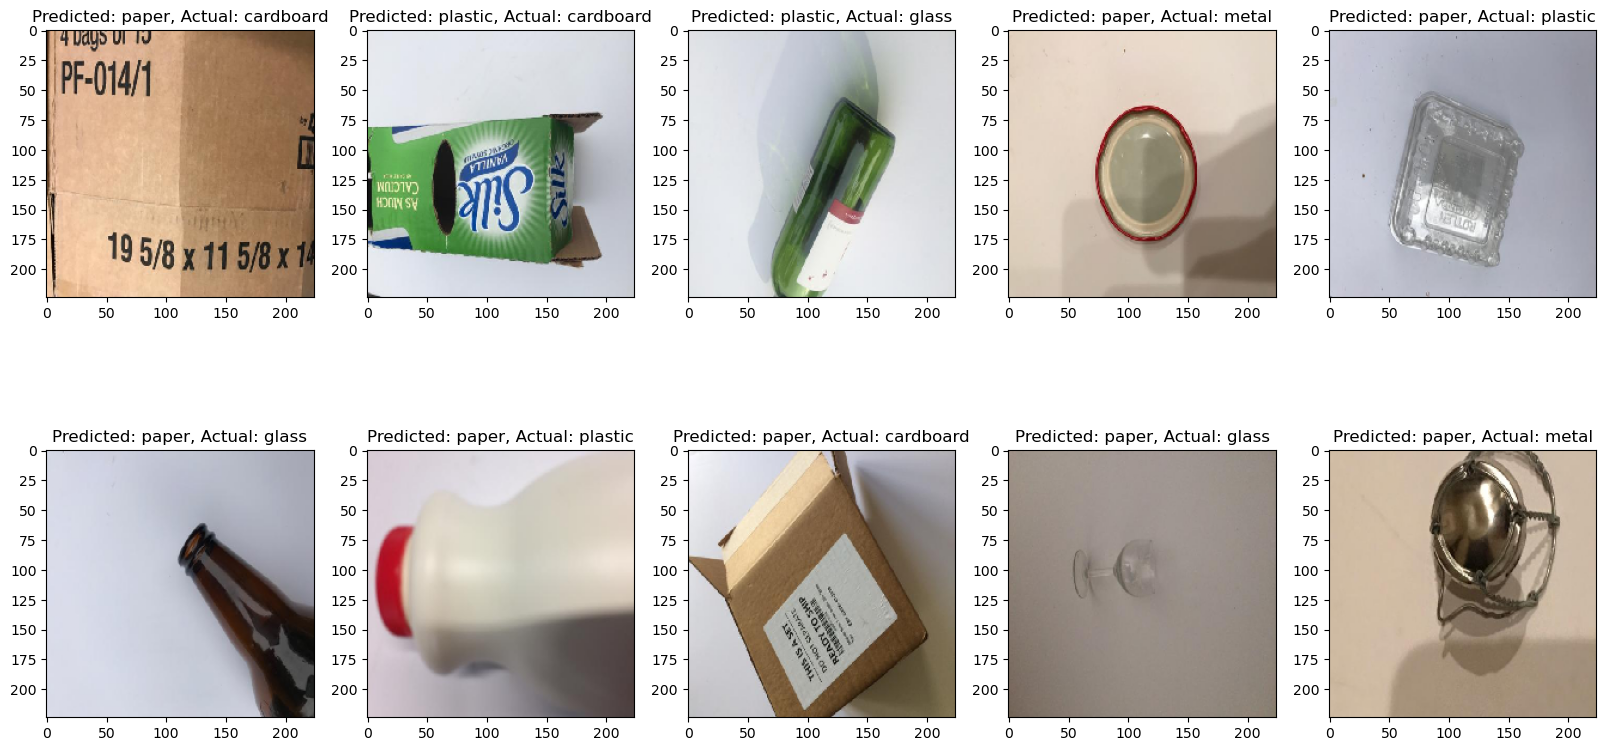

In [ ]:
validation_generator.reset()  # this is necessary to start from the first image again
X_val = []
y_val = []
for _ in range(len(validation_generator)):
    img_batch, label_batch = next(validation_generator)
    X_val.append(img_batch)
    y_val.append(label_batch)

X_val = np.concatenate(X_val)
y_val = np.concatenate(y_val)

predictions = model.predict(X_val)

predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_val, axis=1)

misclassified_indices = np.where(predicted_classes != true_classes)[0]

class_names = list(validation_generator.class_indices.keys())

predicted_classes_labels = [class_names[cls] for cls in predicted_classes]
true_classes_labels = [class_names[cls] for cls in true_classes]

# Display the first 10 misclassified images
plt.figure(figsize=(20,10))
for i in range(10):
    index = misclassified_indices[i]
    plt.subplot(2, 5, i+1)
    plt.imshow(X_val[index]/255)
    plt.title(f"Predicted: {predicted_classes_labels[index]}, Actual: {true_classes_labels[index]}")
#plt.tight_layout()
plt.show()

## **Task 3 (D Task) Improve model generalisability across domains**

So far, you have used training and test images from the same source (via random data split). Now collect new test images from a different source. For example, you may take some photos yourself if you used downloaded images before.
Otherwise, you may take new photos using a different mobile phone or against a different background.

Show sample images from the original test data and the newly collected test data. In what ways are they different?

Feed the new test data into your model. Report the performance change.

Improve your model so that it generalises better on unseen test images.


Found 12415 images belonging to 12 classes.
Found 3100 images belonging to 12 classes.


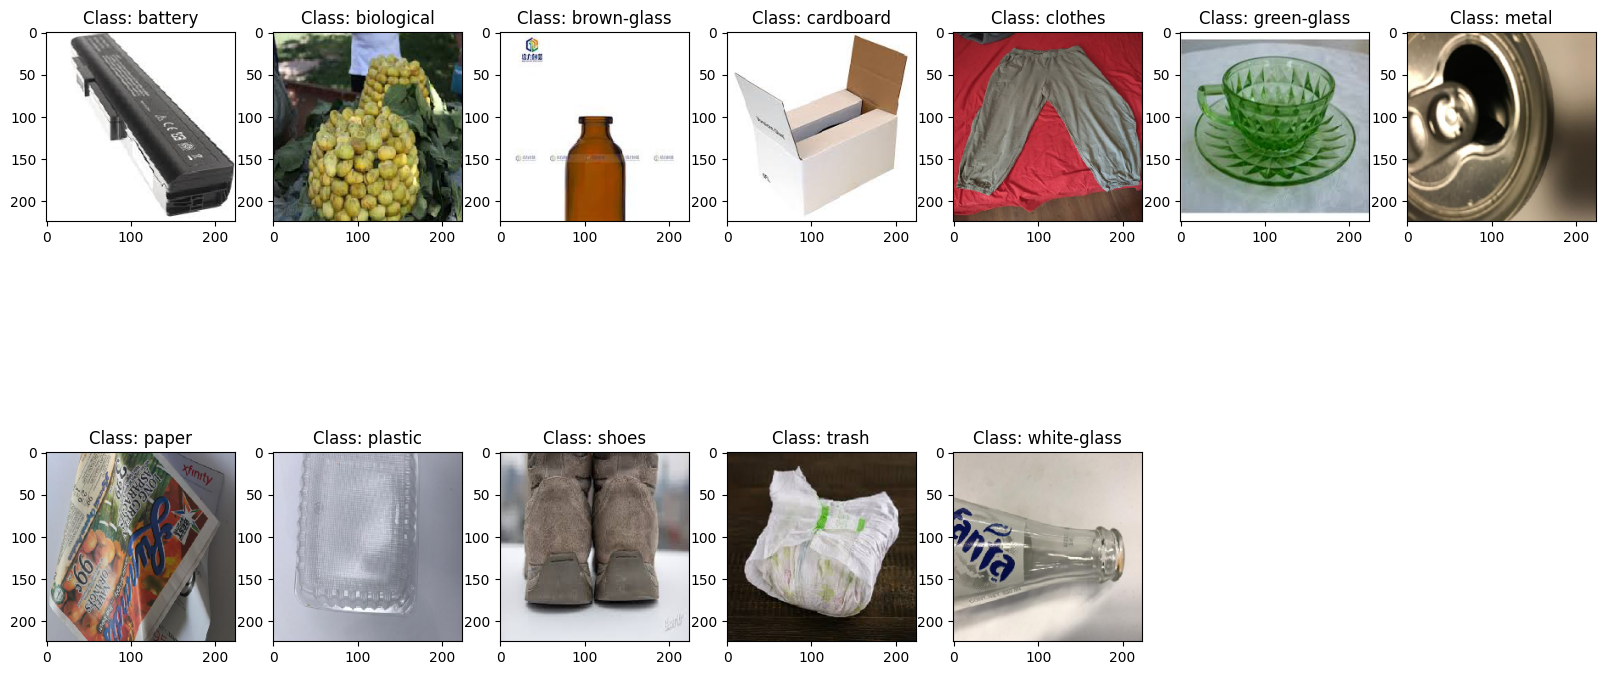

In [8]:
data_dir = "dataset_two"

# Define the image size and batch size
image_size = (224, 224)
batch_size = 32

# Create an ImageDataGenerator for training data
datagen = ImageDataGenerator(
    validation_split=0.2  # Split the dataset into 80% training and 20% testing
)

# Create generators for training and validation data
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Use the 'training' subset
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Use the 'validation' subset
)

# Display example images for each class
class_names = list(train_generator.class_indices.keys())
example_images = {class_name: None for class_name in class_names}

for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        example_image = load_img(image_path, target_size=image_size)
        example_images[class_name] = example_image
        break

# Display the first 10 misclassified images
plt.figure(figsize=(20,10))
for idx, (class_name, example_image) in enumerate(example_images.items()):
    plt.subplot(2, int(len(example_images)/2) + 1, idx+1)
    plt.imshow(example_image)
    plt.title(f'Class: {class_name}')
#plt.tight_layout()
plt.show()

## **Task 4 (HD Task) Build a workable prototype**

Build a web/mobile app that people from your city council can use to determine what to recycle. Test your prototype with the target users and report their feedback.

Upload your code into a GitHub repository.

Create a short video presentation about your product.

In [ ]:
from vit_keras import vit

/home/pjxg191/python/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
model = vit.vit_b32(
        image_size = image_size,
        activation = 'softmax',
        pretrained = True,
        include_top = True,
        pretrained_top = False,
        classes = len(class_names))

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), F1Score(name='f1_score')])


/home/pjxg191/python/miniconda3/envs/tf/lib/python3.9/site-packages/vit_keras/utils.py:81: UserWarning: Resizing position embeddings from 12, 12 to 7, 7
  warnings.warn(


In [ ]:
tensorboard_callback = TensorBoard(log_dir='logs_v3', histogram_freq=1)

lr_scheduler = step_decay_schedule(initial_lr=0.001, decay_factor=0.5, step_size=2)

epochs = 10

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    workers=12,
    use_multiprocessing=True,
    max_queue_size=12,
    callbacks=[tensorboard_callback, lr_scheduler]
)

Epoch 1/10
565/565 [==============================] - 115s 163ms/step - loss: 0.8697 - accuracy: 0.6512 - precision: 0.6944 - recall: 0.5731 - f1_score: 0.6279 - val_loss: 0.6206 - val_accuracy: 0.7621 - val_precision: 0.7958 - val_recall: 0.7190 - val_f1_score: 0.7554 - lr: 0.0010
Epoch 2/10
565/565 [==============================] - 92s 161ms/step - loss: 0.7285 - accuracy: 0.7055 - precision: 0.7485 - recall: 0.6455 - f1_score: 0.6932 - val_loss: 0.6156 - val_accuracy: 0.7621 - val_precision: 0.8132 - val_recall: 0.6379 - val_f1_score: 0.7150 - lr: 0.0010
Epoch 3/10
565/565 [==============================] - 92s 162ms/step - loss: 0.6874 - accuracy: 0.7193 - precision: 0.7620 - recall: 0.6600 - f1_score: 0.7074 - val_loss: 0.5979 - val_accuracy: 0.7603 - val_precision: 0.8040 - val_recall: 0.6931 - val_f1_score: 0.7444 - lr: 5.0000e-04
Epoch 4/10
565/565 [==============================] - 92s 161ms/step - loss: 0.6773 - accuracy: 0.7217 - precision: 0.7671 - recall: 0.6636 - f1_scor

---
**END OF ASSIGNMENT TWO**